<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week12/EVA4_S12_Imagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!cp -rp '/content/drive/My Drive/py_files/models' .
#!cp -rp '/content/drive/My Drive/py_files/utils' .
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-24tup7y_
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-24tup7y_
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=7276481ed2b85461e1bc0905f996799b7fe3d5a038557bcfca8ef7d9ca96ca74
  Stored in directory: /tmp/pip-ephem-wheel-cache-m1q6xx_f/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [0]:
import torch
from datasets.prep_tiny_imagenet import prep_tiny_imagenet
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test
from utils.disp_summary import disp_summary
import torch.nn as nn
from models.resnet import ResNet18,ResNet
import matplotlib.pyplot as plt
#from utils.plot_clr import plot_clr


from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
from utils.data_albument import TrainAlbumentation,TestAlbumentation

In [0]:
prep_tiny_imagenet()

In [2]:
trainset, testset, train_loader, test_loader=download_load()


CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

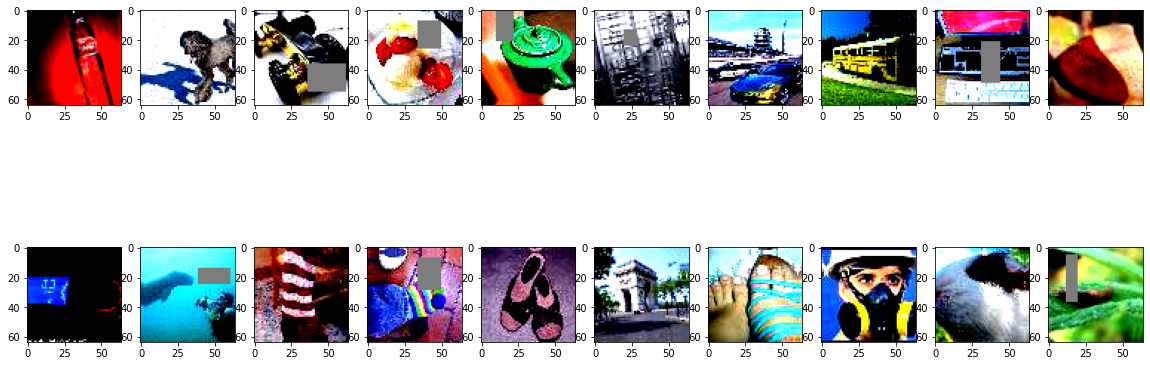

In [3]:
display_imgs(train_loader)

In [0]:
model=ResNet18(200)
model.avgpool = nn.AdaptiveAvgPool2d(1)

use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=model.to(device)

In [5]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
         Dropout2d-3           [-1, 64, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          36,864
       BatchNorm2d-5           [-1, 64, 64, 64]             128
         Dropout2d-6           [-1, 64, 64, 64]               0
            Conv2d-7           [-1, 64, 64, 64]          36,864
       BatchNorm2d-8           [-1, 64, 64, 64]             128
         Dropout2d-9           [-1, 64, 64, 64]               0
       BasicBlock-10           [-1, 64, 64, 64]               0
           Conv2d-11           [-1, 64, 64, 64]          36,864
      BatchNorm2d-12           [-1, 64, 64, 64]             128
        Dropout2d-13           [-1, 64, 64, 64]               0
           Conv2d-14           [-1, 64,

In [0]:
from utils.train_test import train , test

In [6]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

scheduler = OneCycleLR(optimizer, max_lr=0.4,  total_steps=25)
learning_lr_trace= []
for epoch in range(1, 25):
    
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    learning_lr_trace.append(scheduler.get_lr())
    train_loss, train_acc=train(model, device, train_loader, optimizer, epoch)
    test_loss, test_acc_l1=test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/1204 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate [0.016000000000000014]


Loss=4.803696155548096 Batch_id=1203 Accuracy=2.15: 100%|██████████| 1204/1204 [08:37<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -0.9773, Accuracy: 1379/32946 (4.19%)

Epoch: 2 Learning_Rate [0.037992443074583715]


Loss=4.34511137008667 Batch_id=1203 Accuracy=4.09: 100%|██████████| 1204/1204 [08:36<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -1.6203, Accuracy: 2578/32946 (7.82%)

Epoch: 3 Learning_Rate [0.0989315686276181]


Loss=4.380764961242676 Batch_id=1203 Accuracy=6.77: 100%|██████████| 1204/1204 [08:37<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -2.4079, Accuracy: 3806/32946 (11.55%)

Epoch: 4 Learning_Rate [0.18485695739097802]


Loss=4.043537139892578 Batch_id=1203 Accuracy=10.10: 100%|██████████| 1204/1204 [08:38<00:00,  2.32it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -3.1632, Accuracy: 5356/32946 (16.26%)

Epoch: 5 Learning_Rate [0.2760841383121669]


Loss=4.041484355926514 Batch_id=1203 Accuracy=13.73: 100%|██████████| 1204/1204 [08:37<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -3.7557, Accuracy: 6423/32946 (19.50%)

Epoch: 6 Learning_Rate [0.35171406364885144]


Loss=3.7002272605895996 Batch_id=1203 Accuracy=17.29: 100%|██████████| 1204/1204 [08:36<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -4.5460, Accuracy: 8201/32946 (24.89%)

Epoch: 7 Learning_Rate [0.394420828945802]


Loss=3.3662896156311035 Batch_id=1203 Accuracy=20.47: 100%|██████████| 1204/1204 [08:38<00:00,  2.32it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -4.8020, Accuracy: 9049/32946 (27.47%)

Epoch: 8 Learning_Rate [0.3991948620196127]


Loss=2.9657046794891357 Batch_id=1203 Accuracy=23.18: 100%|██████████| 1204/1204 [08:37<00:00,  2.32it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -5.5561, Accuracy: 10249/32946 (31.11%)

Epoch: 9 Learning_Rate [0.39279260096888213]


Loss=3.4085423946380615 Batch_id=1203 Accuracy=25.77: 100%|██████████| 1204/1204 [08:34<00:00,  2.34it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -5.8668, Accuracy: 11115/32946 (33.74%)

Epoch: 10 Learning_Rate [0.38019385280538953]


Loss=3.684260129928589 Batch_id=1203 Accuracy=27.77: 100%|██████████| 1204/1204 [08:34<00:00,  2.34it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -6.3715, Accuracy: 11761/32946 (35.70%)

Epoch: 11 Learning_Rate [0.361803551661394]


Loss=3.616905689239502 Batch_id=1203 Accuracy=29.83: 100%|██████████| 1204/1204 [08:36<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -6.6538, Accuracy: 12266/32946 (37.23%)

Epoch: 12 Learning_Rate [0.33821277694725377]


Loss=2.9279706478118896 Batch_id=1203 Accuracy=31.98: 100%|██████████| 1204/1204 [08:37<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -7.0893, Accuracy: 13085/32946 (39.72%)

Epoch: 13 Learning_Rate [0.31017975557283534]


Loss=2.9323394298553467 Batch_id=1203 Accuracy=33.62: 100%|██████████| 1204/1204 [08:36<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -6.7665, Accuracy: 13332/32946 (40.47%)

Epoch: 14 Learning_Rate [0.2786054919107594]


Loss=2.8708953857421875 Batch_id=1203 Accuracy=35.45: 100%|██████████| 1204/1204 [08:37<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -7.4859, Accuracy: 14014/32946 (42.54%)

Epoch: 15 Learning_Rate [0.24450480877451572]


Loss=2.8552939891815186 Batch_id=1203 Accuracy=36.94: 100%|██████████| 1204/1204 [08:34<00:00,  2.34it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -7.5280, Accuracy: 14356/32946 (43.57%)

Epoch: 16 Learning_Rate [0.20897373017823873]


Loss=2.385186195373535 Batch_id=1203 Accuracy=38.54: 100%|██████████| 1204/1204 [08:28<00:00,  2.37it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -8.2761, Accuracy: 15063/32946 (45.72%)

Epoch: 17 Learning_Rate [0.17315425422308162]


Loss=2.296261787414551 Batch_id=1203 Accuracy=40.26: 100%|██████████| 1204/1204 [08:31<00:00,  2.35it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -8.5794, Accuracy: 15276/32946 (46.37%)

Epoch: 18 Learning_Rate [0.13819764833860604]


Loss=2.489187717437744 Batch_id=1203 Accuracy=41.86: 100%|██████████| 1204/1204 [08:32<00:00,  2.35it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -8.5676, Accuracy: 15656/32946 (47.52%)

Epoch: 19 Learning_Rate [0.10522744660033026]


Loss=2.1004655361175537 Batch_id=1203 Accuracy=43.80: 100%|██████████| 1204/1204 [08:34<00:00,  2.34it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -8.8346, Accuracy: 15917/32946 (48.31%)

Epoch: 20 Learning_Rate [0.0753033384200948]


Loss=2.186922550201416 Batch_id=1203 Accuracy=45.30: 100%|██████████| 1204/1204 [08:37<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -9.1599, Accuracy: 16271/32946 (49.39%)

Epoch: 21 Learning_Rate [0.04938710925645063]


Loss=2.2797114849090576 Batch_id=1203 Accuracy=47.32: 100%|██████████| 1204/1204 [08:36<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -9.4541, Accuracy: 16543/32946 (50.21%)

Epoch: 22 Learning_Rate [0.028311728038661665]


Loss=1.9620988368988037 Batch_id=1203 Accuracy=49.00: 100%|██████████| 1204/1204 [08:37<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -9.7718, Accuracy: 16886/32946 (51.25%)

Epoch: 23 Learning_Rate [0.012754574859949071]


Loss=2.666518449783325 Batch_id=1203 Accuracy=50.44: 100%|██████████| 1204/1204 [08:37<00:00,  2.33it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: -9.8934, Accuracy: 17053/32946 (51.76%)

Epoch: 24 Learning_Rate [0.0032156694239449455]


Loss=1.8868988752365112 Batch_id=1203 Accuracy=51.25: 100%|██████████| 1204/1204 [08:37<00:00,  2.33it/s]



Test set: Average loss: -9.9918, Accuracy: 17132/32946 (52.00%)



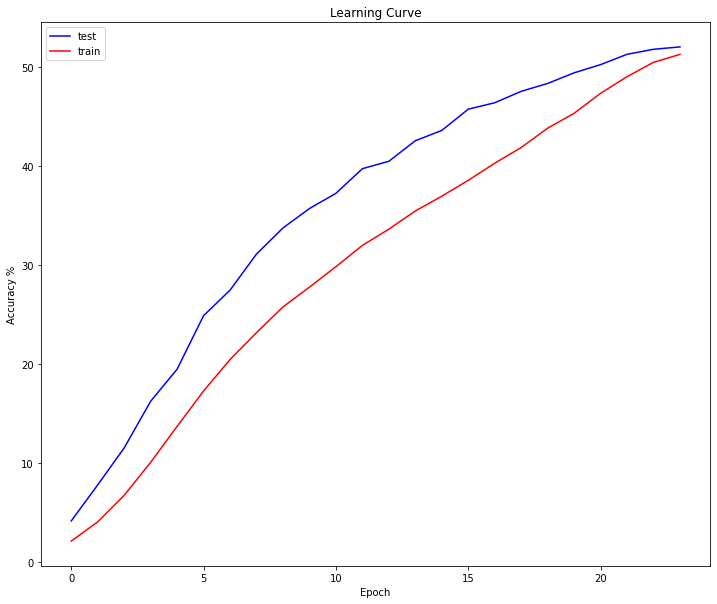

In [7]:
fig= plt.figure(figsize=(12,10))
ax= fig.add_subplot(1,1,1)
#ax.plot( train_acc, color='red')
ax.plot(test_acc_l1, color='blue',label='test')
#ax2=fig.add_subplot(1,2,2)
ax.plot( train_acc, color='red',label='train')
ax.legend()
#ax.set_ylim(97,100)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy %')
ax.set_title('Learning Curve')
plt.savefig('Learnig_curve.png')
plt.show()